### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn.datasets import *

## Failures in linear model

Suppose the given data set as follows:

Text(0,0.5,'Feature 1')

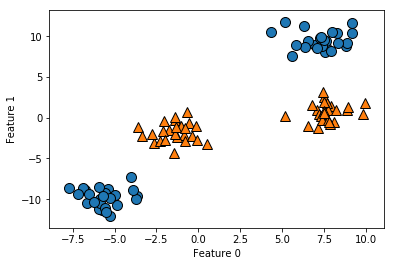

In [3]:
X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model classfication can only seperate using a line, and will not be able to do a very good job on this dataset.

In [4]:
linear_svm=LinearSVC().fit(X,y)

Text(0,0.5,'Feature 1')

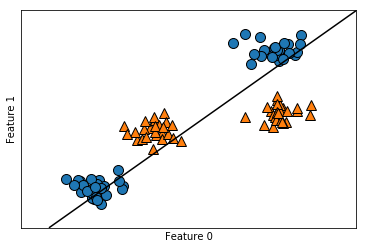

In [5]:
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

POOR PERFORMANCE! by linear model on the above dataset

## IMPROVING THE PERFORMANCE OF LINEAR MODELS BY ADDING MORE FEATURES

Linear models can be quite limiting in low dimensional spaces as lines and planes have limited flexibility.
One way to make linear model more flexible is to add more features-for example by adding interactions of the input features.
Here will we make a third features which will be feature2=feature1**2 so now there are three features - (feature0,feature1,feature2)

#### Drawing the above mentioned 3D plot using three features(feature0,feature1,feature2)

Text(0.5,0,'feature1 ** 2')

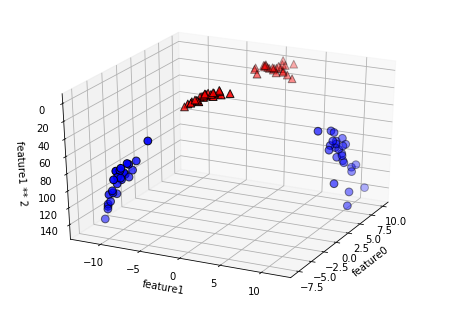

In [6]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

 In new representation of data , it is now possible to separate the two classes(blue,red coloured) using a linear model , a plane in 3D.

### Drawing a decision boundary for the above data using linear model

Text(0.5,0,'feature1 ** 2')

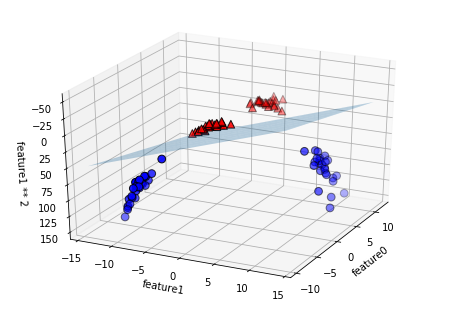

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Explanation: As a function of the original features,the linear SVM model is not actually linear anymore ,decision boundary is not a line anymore but more of an ellipse , you can see it in the below plot :

Pink: region above the elliptical decision boundary
Blue: Region below the ellpitical decision boundary

Text(0,0.5,'Feature 1')

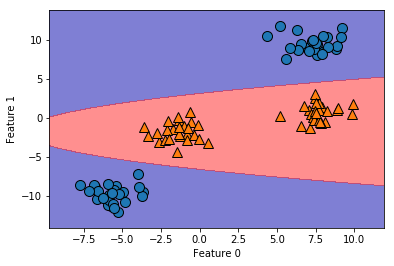

In [8]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Training a SVM on 2D 2 Class DataSet

Text(0,0.5,'Feature 1')

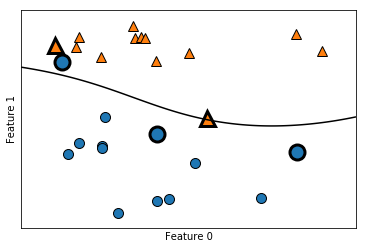

In [9]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#plot support vectors
sv=svm.support_vectors_
#class labels of support vectors are given by the sign of the dual coefficients
sv_labels=svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel('Feature 1')

Explanation: 

The SVM learns how important each of the training data points is to represent the decision boundary between the two classes.

Typically only a subset of training data matter for defining the decision boundary : one that lie on or near to borders between the classes. These vectors are called SUPPORT VECTORS.
    
A classification decision is made based on the distances to the support vectors , and the importance of the support vectors that was learned during training (stored in the dual_coef_ attributr of svc)

## SVM PARAMETERS

**THE gamma Parameter :**it controls the width of the gaussian kernel.A small gamma means a large radius for the Gaussian kernel means that many points are considered close by means ,a smoother decision boundary. More gamma more decision boundry try to classify each point correctly in training data more overfitting.

**The C parameter:**it is a regularization parameter , it limits the importance of each point. Less the value of C less the importance of each point hence less overfitting,more C more influence of each point,causing decision boundary to bend correctly to classify the points so more overfitting caused. 

### RBF kernel SVM to the Breast Cancer DataSet ,By default C=1 and gmma=1/n_features

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [11]:
svc=SVC().fit(X_train,y_train)

In [12]:
print("Accuracy on train set {}".format(svc.score(X_train,y_train)))
print("Accuracy on test set {}" .format(svc.score(X_test,y_test)))

Accuracy on train set 1.0
Accuracy on test set 0.6293706293706294


Explanation: the model overfits substantially but have only 63% of accuracy on test set.
While SVM performs quite well,they are very senstitive to scaling of data.That means they require all the features to vary on a similar scale.
So lets look at the maximum and minimum values for each features of Breast Cancer Dataset

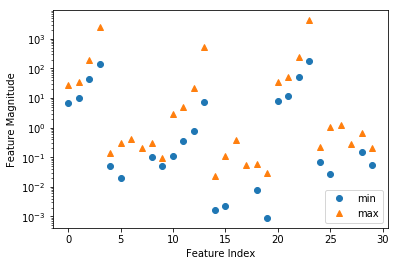

In [13]:
plt.plot(X_train.min(axis=0),'o',label='min')
plt.plot(X_train.max(axis=0),'^',label='max')
plt.legend(loc=4)
plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude")
plt.yscale('log')

## PreProcessing of data for SVMs

Above we can see that features of the Breast Cancer dataset sre of completely different magnitude.One way to resolve this problem is by rescaling each feature so that they are approximately on the same scale.

One of the way to rescale the data is to scale in such a way that all features are between 0 and 1.

#### Compute minimum value per feature  on the training set

In [26]:
min_on_training =X_train.min(axis=0)

In [27]:
min_on_training

array([  6.98100000e+00,   9.71000000e+00,   4.37900000e+01,
         1.43500000e+02,   5.26300000e-02,   1.93800000e-02,
         0.00000000e+00,   0.00000000e+00,   1.06000000e-01,
         4.99600000e-02,   1.11500000e-01,   3.62800000e-01,
         7.57000000e-01,   7.22800000e+00,   1.71300000e-03,
         2.25200000e-03,   0.00000000e+00,   0.00000000e+00,
         7.88200000e-03,   8.94800000e-04,   7.93000000e+00,
         1.20200000e+01,   5.04100000e+01,   1.85200000e+02,
         7.11700000e-02,   2.72900000e-02,   0.00000000e+00,
         0.00000000e+00,   1.56500000e-01,   5.50400000e-02])

#### Compute the range of each feature

In [31]:
range_on_training=(X_train-min_on_training).max(axis=0)

In [32]:
range_on_training

array([  2.11290000e+01,   2.41000000e+01,   1.44710000e+02,
         2.35750000e+03,   9.20700000e-02,   2.92020000e-01,
         4.26800000e-01,   2.01200000e-01,   1.98000000e-01,
         4.74800000e-02,   2.76150000e+00,   4.52220000e+00,
         2.12230000e+01,   5.34972000e+02,   2.16170000e-02,
         1.04148000e-01,   3.96000000e-01,   5.27900000e-02,
         5.35780000e-02,   2.89452000e-02,   2.81100000e+01,
         3.75200000e+01,   2.00790000e+02,   4.06880000e+03,
         1.51430000e-01,   1.03071000e+00,   1.25200000e+00,
         2.90300000e-01,   5.07300000e-01,   1.52460000e-01])

In [36]:
X_train_scaled=(X_train-min_on_training)/range_on_training

In [37]:
X_train_scaled

array([[ 0.23044157,  0.32157676,  0.21940433, ...,  0.31484671,
         0.30277942,  0.09858323],
       [ 0.20062473,  0.42116183,  0.19452699, ...,  0.06965208,
         0.34042973,  0.06677161],
       [ 0.62232003,  0.76929461,  0.60403566, ...,  0.56079917,
         0.19850187,  0.07431457],
       ..., 
       [ 0.11619102,  0.35726141,  0.11077327, ...,  0.17402687,
         0.17524147,  0.17263545],
       [ 0.12963226,  0.35311203,  0.11706171, ...,  0.        ,
         0.06780997,  0.06919848],
       [ 0.21434995,  0.59004149,  0.21235575, ...,  0.33251808,
         0.10782574,  0.21172767]])

In [38]:
print("Minimum for each feature \n {}".format(X_train_scaled.min(axis=0)))

Minimum for each feature 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [39]:
print("Maximum for each feature \n {}".format(X_train_scaled.max(axis=0)))

Maximum for each feature 
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [45]:
X_test_scaled=(X_test-min_on_training)/range_on_training

In [40]:
svc=SVC()

In [42]:
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
print("Accuracy on training set : {:.3f}".format(svc.score(X_train_scaled,y_train)))

Accuracy on training set : 0.948


In [46]:
print("Accuracy on test set : {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on test set : 0.951


We can see above scaling of data made a huge difference , now we are underfitting where training and test performances are quite similar but less close to 100%

Now we can improve the performance either incerasing gamma or C to fit to more complex model.

#### Increasing value of C to improve model complexity after rescaling 

In [47]:
svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
print("Accuracy on training set : {:.3f}".format(svc.score(X_train_scaled,y_train)))

Accuracy on training set : 0.988


In [49]:
print("Accuracy on test set : {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on test set : 0.972


we see that on increasing C we improve model si